***#Fashion MNIST Dataset***

Description:

- Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Load Data

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
X_train_full.shape

(60000, 28, 28)

# Data Preprocessing

In [5]:
X_train_full.dtype

dtype('uint8')

In [0]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
X_valid.shape

(5000, 28, 28)

In [0]:
X_train.shape

(55000, 28, 28)

In [0]:
X_valid1=X_valid.reshape((5000,28,28,1))
X_train1=X_train.reshape((55000,28,28,1))
X_test1=X_test.reshape((10000,28,28,1))

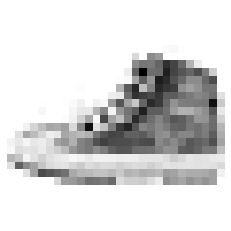

In [0]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [0]:
X_valid.shape

(5000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

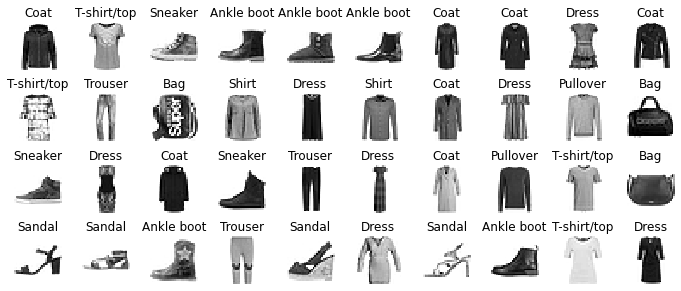

In [0]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Model without Convnet

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2,seed=123))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2,seed=123))
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.2,seed=123),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(rate=0.2,seed=123),
    keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

#Compile Model

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Model

In [0]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8529 - accuracy: 0.7103 - val_loss: 0.5266 - val_accuracy: 0.8160
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5602 - accuracy: 0.8063 - val_loss: 0.4494 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4972 - accuracy: 0.8253 - val_loss: 0.4357 - val_accuracy: 0.8398
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4615 - accuracy: 0.8368 - val_loss: 0.3969 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4365 - accuracy: 0.8450 - val_loss: 0.3789 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4152 - accuracy: 0.8518 - val_loss: 0.3684 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4040 - accuracy: 0.8552 - val_loss: 0.3577 - val_accuracy:

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Evaluate Model

In [0]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.8814


[0.3280855715274811, 0.8813999891281128]

# Hyperparameter Tunning

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
def build_model(n_hidden=2, n_neurons=300,output_n=10, learning_rate=3e-3, input_shape=[28,28],rate=0.2):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    
    for i in range(n_hidden):
        n_neurons=int(n_neurons/(i+1))
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dropout(rate=rate,seed=123))
    model.add(keras.layers.Dense(output_n, activation="softmax"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    return model

In [0]:
keras_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_distribs = {
    "rate" :[0.1,0.2],
    'n_neurons':[300, 400, 500,600]
}

grid_search_cv = GridSearchCV(keras_model, param_distribs, cv=3, verbose=2)
grid_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_neurons=300, rate=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8630 - accuracy: 0.7180 - val_loss: 0.5666 - val_accuracy: 0.8138
Epoch 2/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5707 - accuracy: 0.8046 - val_loss: 0.4832 - val_accuracy: 0.8342
Epoch 3/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5093 - accuracy: 0.8249 - val_loss: 0.4431 - val_accuracy: 0.8470
Epoch 4/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4731 - accuracy: 0.8364 - val_loss: 0.4173 - val_accuracy: 0.8532
Epoch 5/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4459 - accuracy: 0.8442 - val_loss: 0.4071 - val_accuracy: 0.8602
Epoch 6/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4249 - accuracy: 0.8511 - val_loss: 0.3862 - val_accuracy: 0.8650
Epoch 7/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4087 - accuracy: 0.8552 - val_loss: 0.3803 - val_ac

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.8min remaining:    0.0s


Epoch 1/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.8807 - accuracy: 0.7037 - val_loss: 0.5658 - val_accuracy: 0.8164
Epoch 2/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5781 - accuracy: 0.7998 - val_loss: 0.4758 - val_accuracy: 0.8434
Epoch 3/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5146 - accuracy: 0.8208 - val_loss: 0.4493 - val_accuracy: 0.8488
Epoch 4/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4803 - accuracy: 0.8302 - val_loss: 0.4272 - val_accuracy: 0.8592
Epoch 5/100
1146/1146 [==============================] - 4s 3ms/step - loss: 0.4504 - accuracy: 0.8413 - val_loss: 0.4015 - val_accuracy: 0.8656
Epoch 6/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4332 - accuracy: 0.8451 - val_loss: 0.4000 - val_accuracy: 0.8616
Epoch 7/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.4160 - accuracy: 0.8517 - val_loss: 0.3821 - val_ac

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 116.6min finished


Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7581 - accuracy: 0.7444 - val_loss: 0.5188 - val_accuracy: 0.8254
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5150 - accuracy: 0.8209 - val_loss: 0.4341 - val_accuracy: 0.8542
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4610 - accuracy: 0.8375 - val_loss: 0.4402 - val_accuracy: 0.8412
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4286 - accuracy: 0.8492 - val_loss: 0.3910 - val_accuracy: 0.8666
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4057 - accuracy: 0.8568 - val_loss: 0.3713 - val_accuracy: 0.8724
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3865 - accuracy: 0.8621 - val_loss: 0.3596 - val_accuracy: 0.8766
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3726 - accuracy: 0.8671 - val_loss: 0.3536 - val_ac

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7faebacd2908>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_neurons': [300, 400, 500, 600], 'rate': [0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
grid_search_cv.best_params_

{'n_neurons': 400, 'rate': 0.1}

In [0]:
grid_search_cv.best_score_

-0.30049745241800946

In [0]:
grid_search_cv.score(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8831


-0.3254154920578003

# Model with Convnet

In [0]:
keras.backend.clear_session()
np.random.seed(42)
#tf.random.set_seed(42)

In [0]:

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [0]:
X_train.shape

(55000, 28, 28)

In [0]:
history = model.fit(X_train1, y_train, epochs=100, validation_data=(X_valid1, y_valid))

Epoch 1/100
1719/1719 [==============================] - 51s 30ms/step - loss: 1.0533 - accuracy: 0.6246 - val_loss: 0.6524 - val_accuracy: 0.7602
Epoch 2/100
1719/1719 [==============================] - 52s 30ms/step - loss: 0.6086 - accuracy: 0.7715 - val_loss: 0.4977 - val_accuracy: 0.8180
Epoch 3/100
1719/1719 [==============================] - 51s 30ms/step - loss: 0.5294 - accuracy: 0.8029 - val_loss: 0.4838 - val_accuracy: 0.8152
Epoch 4/100
1719/1719 [==============================] - 51s 30ms/step - loss: 0.4857 - accuracy: 0.8208 - val_loss: 0.4140 - val_accuracy: 0.8536
Epoch 5/100
1719/1719 [==============================] - 51s 30ms/step - loss: 0.4505 - accuracy: 0.8342 - val_loss: 0.4121 - val_accuracy: 0.8528
Epoch 6/100
1719/1719 [==============================] - 51s 30ms/step - loss: 0.4218 - accuracy: 0.8453 - val_loss: 0.3676 - val_accuracy: 0.8700
Epoch 7/100
1719/1719 [==============================] - 51s 30ms/step - loss: 0.3990 - accuracy: 0.8542 - val_loss: 0

In [0]:
model.evaluate(X_test1, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3949 - accuracy: 0.9101


[0.39487457275390625, 0.910099983215332]

In [0]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

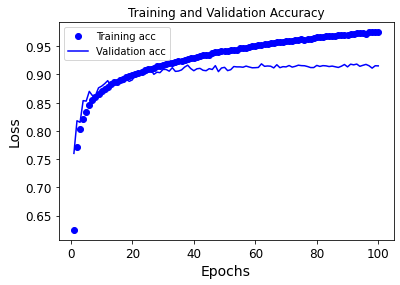

In [0]:
#plt.clf()
epochs= range(1, len(acc)+1)
history_dict= history.history
acc=history_dict['accuracy']
val_acc= history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
history = model.fit(X_train1, y_train, epochs=30, validation_data=(X_valid1, y_valid))

Epoch 1/30
1719/1719 [==============================] - 51s 30ms/step - loss: 1.0332 - accuracy: 0.6259 - val_loss: 0.6959 - val_accuracy: 0.7396
Epoch 2/30
1719/1719 [==============================] - 51s 30ms/step - loss: 0.6315 - accuracy: 0.7601 - val_loss: 0.5180 - val_accuracy: 0.8074
Epoch 3/30
1719/1719 [==============================] - 51s 30ms/step - loss: 0.5491 - accuracy: 0.7922 - val_loss: 0.4861 - val_accuracy: 0.8176
Epoch 4/30
1719/1719 [==============================] - 51s 30ms/step - loss: 0.4971 - accuracy: 0.8149 - val_loss: 0.4323 - val_accuracy: 0.8454
Epoch 5/30
1719/1719 [==============================] - 51s 30ms/step - loss: 0.4609 - accuracy: 0.8290 - val_loss: 0.4075 - val_accuracy: 0.8530
Epoch 6/30
1719/1719 [==============================] - 51s 30ms/step - loss: 0.4315 - accuracy: 0.8418 - val_loss: 0.3824 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 51s 30ms/step - loss: 0.4063 - accuracy: 0.8508 - val_loss: 0.3698 -

In [0]:
model.evaluate(X_test1, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2751 - accuracy: 0.9018


[0.2751360833644867, 0.9017999768257141]

## Hyperparameter Tunning



In [0]:
keras.backend.clear_session()
np.random.seed(42)
#tf.random.set_seed(42)

In [0]:
def build_model(n_hidden=2, n_neurons=300,output_n=10, learning_rate=3e-3, input_shape=[28,28],rate=0.2):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.Flatten())
    for i in range(n_hidden):
        n_neurons=int(n_neurons/(i+1))
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dropout(rate=rate,seed=123))
    model.add(keras.layers.Dense(output_n, activation="softmax"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    return model

In [0]:
keras_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [14]:
param_distribs = {
    "rate" :[0.1,0.2],
    'n_neurons':[600,700]
}

grid_search_cv = GridSearchCV(keras_model, param_distribs, cv=3, verbose=2)
grid_search_cv.fit(X_train1, y_train, epochs=30,
                  validation_data=(X_valid1, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_neurons=600, rate=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/30
1146/1146 [==============================] - 5s 4ms/step - loss: 1.1561 - accuracy: 0.5763 - val_loss: 0.6928 - val_accuracy: 0.7400
Epoch 2/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.6489 - accuracy: 0.7547 - val_loss: 0.5369 - val_accuracy: 0.8034
Epoch 3/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.5510 - accuracy: 0.7929 - val_loss: 0.4858 - val_accuracy: 0.8114
Epoch 4/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.4980 - accuracy: 0.8122 - val_loss: 0.4299 - val_accuracy: 0.8400
Epoch 5/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.4616 - accuracy: 0.8295 - val_loss: 0.4257 - val_accuracy: 0.8448
Epoch 6/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.4327 - accuracy: 0.8393 - val_loss: 0.3975 - val_accuracy: 0.8570
Epoch 7/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.4094 - accuracy: 0.8492 - val_loss: 0.3757 - val_accuracy:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s


Epoch 1/30
1146/1146 [==============================] - 5s 4ms/step - loss: 1.1792 - accuracy: 0.5683 - val_loss: 0.7121 - val_accuracy: 0.7372
Epoch 2/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.6789 - accuracy: 0.7394 - val_loss: 0.5985 - val_accuracy: 0.7762
Epoch 3/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.5819 - accuracy: 0.7772 - val_loss: 0.5169 - val_accuracy: 0.8052
Epoch 4/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.5269 - accuracy: 0.7997 - val_loss: 0.4782 - val_accuracy: 0.8212
Epoch 5/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.4875 - accuracy: 0.8164 - val_loss: 0.4263 - val_accuracy: 0.8446
Epoch 6/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.4541 - accuracy: 0.8295 - val_loss: 0.4101 - val_accuracy: 0.8488
Epoch 7/30
1146/1146 [==============================] - 5s 4ms/step - loss: 0.4253 - accuracy: 0.8412 - val_loss: 0.4028 - val_accuracy:

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 28.6min finished


Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0504 - accuracy: 0.6082 - val_loss: 0.6201 - val_accuracy: 0.7694
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6198 - accuracy: 0.7637 - val_loss: 0.5052 - val_accuracy: 0.8050
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5241 - accuracy: 0.8006 - val_loss: 0.4716 - val_accuracy: 0.8188
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4704 - accuracy: 0.8246 - val_loss: 0.4030 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4277 - accuracy: 0.8427 - val_loss: 0.3846 - val_accuracy: 0.8634
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3983 - accuracy: 0.8530 - val_loss: 0.3632 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3739 - accuracy: 0.8621 - val_loss: 0.3646 - val_accuracy:

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f600271ada0>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_neurons': [600, 700], 'rate': [0.1, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [15]:
grid_search_cv.best_params_

{'n_neurons': 700, 'rate': 0.2}

In [16]:
grid_search_cv.best_score_

-0.27823545535405475

In [17]:
grid_search_cv.score(X_test1, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.9046


-0.2700422704219818